# Simulating average tendency estimation with low accuracy probability model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

emotions=['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
years = np.arange( 2000, 2020, 1 )
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [2]:
#Example dynamics. Actual dynamics of headlines emotions detected by the model. But any other trend can be used
anger=[0.052922956088196124, 0.05691596631151469, 0.06051291813101013, 0.06292666546454836, 0.06348758906208288, 0.060404690484145804, 0.06440691355598663, 0.062303939786746136, 0.05875056311805459, 0.06672178821119187, 0.07407444792257771, 0.07763184546370987, 0.07962368891984109, 0.08310836638575639, 0.08732062585672147, 0.0898811369506272, 0.09455888201882591, 0.10447684164392708, 0.11283230348529612, 0.11988147180339927]
disgust=[0.04962318522166234, 0.04824515019732007, 0.0496969993421133, 0.05700953470768139, 0.04934487078965872, 0.05356594852514324, 0.058217995403624594, 0.05213271267824485, 0.046823630645434745, 0.050455776658708616, 0.04645058356122776, 0.048194996241199745, 0.05204704475812867, 0.05413368784038984, 0.061921929455451025, 0.0639478824268633, 0.06719041832771978, 0.06579110639519356, 0.06894919415184035, 0.06880745444159143]
fear=[0.05858965108581582, 0.08641405806377693, 0.09146591106266809, 0.08860859877842826, 0.0815080952716414, 0.08709820167125867, 0.08966905722682558, 0.08856102047621398, 0.08010117353729587, 0.08493142468872161, 0.11229956446936601, 0.13004328645348628, 0.10217161815329272, 0.11167792455088402, 0.12028207414716555, 0.13265661652874153, 0.13373738695770376, 0.14348899079054311, 0.14262300119667853, 0.1430187836789929]
joy=[0.03863908948032278, 0.04116453372847129, 0.0430456888876522, 0.03578049561638471, 0.038426941029039506, 0.03901385236607528, 0.0433884767887162, 0.043412490082845104, 0.044288922458694854, 0.05105494739642221, 0.06021980597977391, 0.05453364566875005, 0.060730514229985405, 0.055970149498136106, 0.05482305393929232, 0.05340709515587489, 0.05090815105881534, 0.05092909344548547, 0.04855185905888098, 0.046736456507852]
neutral=[0.6901266237536088, 0.6449507507151893, 0.6371762600601083, 0.6397172864800525, 0.6587800520655138, 0.6408954186935916, 0.6324395664077922, 0.6378514256907007, 0.652339367583403, 0.6169999052669458, 0.5781145770424626, 0.5538423493324384, 0.5707015159166468, 0.5518277899896766, 0.5315180360433504, 0.5167358938133809, 0.5144242279012328, 0.5012217756825325, 0.48759947587424957, 0.481113448636602]
sadness=[0.08501672956885688, 0.0964065588347608, 0.09184977789272221, 0.09143986576294247, 0.08089027287270086, 0.09102880371304538, 0.08185475714964112, 0.08559587848227429, 0.08836942607925087, 0.0989319702023191, 0.10276392115111842, 0.10976117278509022, 0.10954879212311394, 0.1182331492986466, 0.11890671079676343, 0.11709288693146222, 0.11388755072538026, 0.11051875409769911, 0.11757921132229225, 0.11973409741442723]
surprise=[0.025081764801537294, 0.02590298214896696, 0.02625244462372559, 0.024517553189962266, 0.027562178909362602, 0.027993084546740037, 0.030023233467413597, 0.030142532802974756, 0.029326916577865892, 0.030904187575690568, 0.026077099873473675, 0.02599270405532538, 0.025176825898991295, 0.025048932436510265, 0.025227569761255945, 0.02627848819304991, 0.025293383010322065, 0.023573437944619156, 0.021864954910762166, 0.02070828751713526]

# anger = list(np.arange( 0.00,0.2,0.01 )) #Example of alternative trend
emotionsDynamics=[anger, disgust, fear, joy, neutral, sadness, surprise,]

In [3]:
#Confusion matrix of Model performance
cm=np.array([[ 107,   42,   77,    4,  182,   44,    7],
       [  72,  108,   57,   15,  218,   60,   10],
       [  37,   27,  140,    8,  188,   51,    4],
       [  23,   11,   36,   90,  336,   38,   16],
       [ 168,   91,  216,  108, 1469,  190,   37],
       [  36,   24,   66,    9,  174,  127,    8],
       [  58,   31,   60,   30,  352,   56,   35]])
cm

array([[ 107,   42,   77,    4,  182,   44,    7],
       [  72,  108,   57,   15,  218,   60,   10],
       [  37,   27,  140,    8,  188,   51,    4],
       [  23,   11,   36,   90,  336,   38,   16],
       [ 168,   91,  216,  108, 1469,  190,   37],
       [  36,   24,   66,    9,  174,  127,    8],
       [  58,   31,   60,   30,  352,   56,   35]])

In [4]:
probabilityGroundTruthClassesOccurrence=cm.sum(axis=1)/cm.sum()
probabilityGroundTruthClassesOccurrence

array([0.08649356, 0.10087801, 0.08499907, 0.10274612, 0.42574257,
       0.08294414, 0.11619653])

In [5]:
predictions=cm.sum(axis=0)
predictions

array([ 501,  334,  652,  264, 2919,  566,  117])

In [6]:
probabilityClassPrediction= predictions/predictions.sum()
probabilityClassPrediction

array([0.09359238, 0.06239492, 0.12180086, 0.04931814, 0.5453017 ,
       0.1057351 , 0.0218569 ])

In [7]:
probabilityClassPredictionCorrect=cm.diagonal()/cm.sum(axis=0)
probabilityClassPredictionCorrect

array([0.21357285, 0.32335329, 0.21472393, 0.34090909, 0.50325454,
       0.22438163, 0.2991453 ])

In [8]:
probabilityClassPredictionIncorrect=1-probabilityClassPredictionCorrect
probabilityClassPredictionIncorrect

array([0.78642715, 0.67664671, 0.78527607, 0.65909091, 0.49674546,
       0.77561837, 0.7008547 ])

In [9]:
probabilityTruePositives=cm.diagonal()/cm.sum(axis=1) #i.e TP/P True positive rate (TPR), recall, sensitivity (SEN), probability of detection,
probabilityTruePositives

array([0.23110151, 0.2       , 0.30769231, 0.16363636, 0.64458096,
       0.28603604, 0.0562701 ])

In [10]:
probabilityFalsePositives=(cm.sum(axis=0)-cm.diagonal())/cm.sum() #i.e. FP/N False positive rate (FPR),probability of false alarm,
probabilityFalsePositives

array([0.07360359, 0.04221932, 0.0956473 , 0.03250514, 0.27087614,
       0.08201009, 0.01531851])

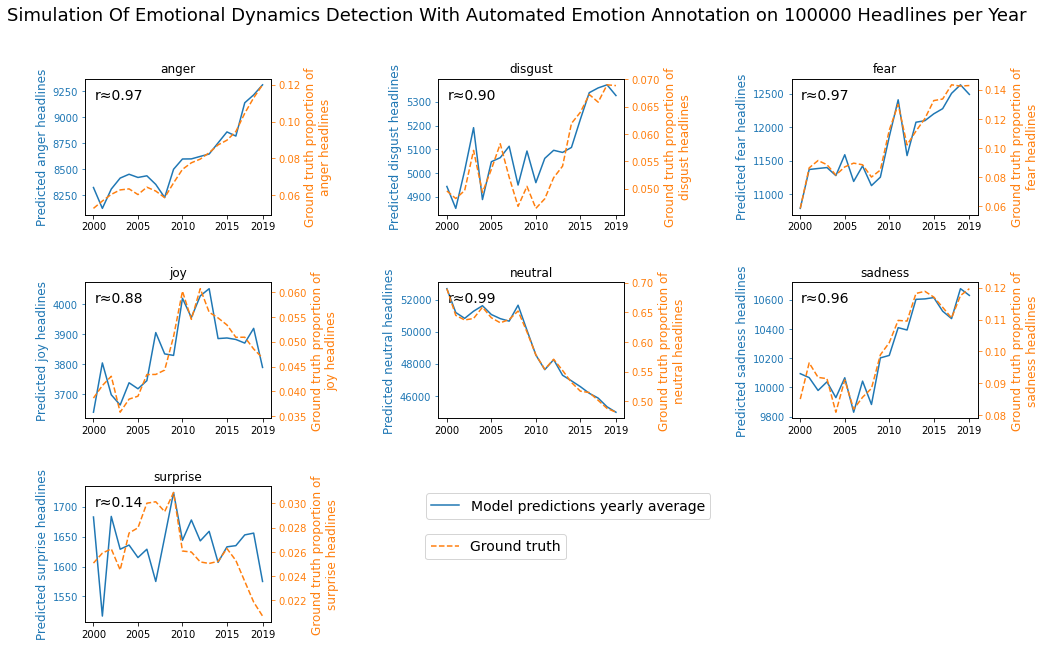

In [15]:
nrows=3
ncols=3
fig, axs = plt.subplots(nrows, ncols,figsize=(16,10))

headlinesPerYear = 100000
# headlinesPerYear = 100
plotIndex=0
np.random.seed(1)
for rowIndex in range(nrows):
    for columnIndex in range(ncols):
        classIndex=plotIndex
        
        yearCounters=[]
        for yearIndex,year in enumerate(years):
            yearCounter = 0
            for i in range(headlinesPerYear):
                pClassOccurs=emotionsDynamics[classIndex][yearIndex]
                if np.random.uniform() < pClassOccurs: 
                    if np.random.uniform() < probabilityTruePositives[classIndex]:
                        yearCounter+=1
                    continue
                else:
                    if np.random.uniform() < probabilityFalsePositives[classIndex]:
                        yearCounter+=1
                        continue

            yearCounters.append(yearCounter)
            
        axs[rowIndex,columnIndex].plot(years,yearCounters,label="Model predictions yearly average")    
        axs[rowIndex,columnIndex].set_title(emotions[plotIndex]) 
        axs[rowIndex,columnIndex].set_xticks(list(years[::5])+[2019]) 
        axs[rowIndex,columnIndex].tick_params(axis='y', colors='C0')
        axs[rowIndex, columnIndex].set_ylabel(f"Predicted {emotions[plotIndex]} headlines",fontsize=12, color="C0")
        ax2 = axs[rowIndex,columnIndex].twinx()
        ax2.plot(years,emotionsDynamics[classIndex],linestyle='--', color="C1",label="Ground truth")
        ax2.set_ylabel(f"Ground truth proportion of\n{emotions[plotIndex]} headlines",fontsize=12, color="C1")
        ax2.tick_params(axis='y', colors='C1')
        
        r=np.corrcoef(yearCounters,emotionsDynamics[classIndex])[0,1]
        axs[rowIndex, columnIndex].text(0.05, 0.85,f"r≈{str(r)[:4]}",transform=axs[rowIndex, columnIndex].transAxes,fontsize=14,color="k")
        
        if rowIndex==2 and columnIndex==0:
            axs[rowIndex,columnIndex].legend(bbox_to_anchor=(3.4, 1.0),fontsize=14,ncol=1)
            ax2.legend(bbox_to_anchor=(2.625, 0.7),fontsize=14,ncol=1)
            
        plotIndex+=1
        if plotIndex>6:
            break
            
axs[nrows-1,ncols-1].axis('off')            
axs[nrows-1,ncols-2].axis('off') 
plt.subplots_adjust(hspace=0.5,wspace=0.9)     


figureTitle=f"Simulation Of Emotional Dynamics Detection With Automated Emotion Annotation on {headlinesPerYear} Headlines per Year"
st=fig.suptitle(figureTitle, y=0.98,fontsize=18)    
fig.savefig(f'../manuscript/figures/sm/simulationOfPatternDetectionWithGivenModelPerformance{headlinesPerYear}Headlines.png',dpi=400,bbox_inches='tight',pad_inches=0)#High-resolution    